# 프로그래밍3 프로젝트

학과: 데이터사이언스학부 학번: 201902293 이름: 김수현

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
df=pd.read_csv('C:/Users/user-pc/Downloads/Enter_korea_by_purpose.csv')
type(df)

pandas.core.frame.DataFrame

이 데이터는 한국관광공사(KOT)의 출처로 외국인이 한국에 방문하는 목적에 대한 데이터이다.
데이터 자료는 날짜, 국가, 방문자 수, 전년 대비 방문자 수 증가율, 당월 전체 방문자 비율,
관광, 사업, 공무, 공부, 기타 순으로 나열되어 있다.

코로나 바이러스 발생 이후 방문객 수가 줄어들었는지 분석하고 한국을 방문하는 가장 큰 목적이 무엇인지 분석한다.

# 데이터 속성

In [17]:
df

,date,nation,visitor,growth,share,tourism,business,official affairs,studying,others
0,2019-1,China,392814,28.737870,35.555117,320113,2993,138,8793,60777
1,2019-1,Japan,206526,23.606830,18.693468,198805,2233,127,785,4576
2,2019-1,Taiwan,87954,16.003693,7.961057,86393,74,22,180,1285
3,2019-1,Hong Kong,35896,3.533212,3.249086,34653,59,2,90,1092
4,2019-1,Macao,2570,-12.376406,0.232621,2506,2,0,17,45
...,...,...,...,...,...,...,...,...,...,...
955,2020-4,Oceania others,13,-97.239915,0.044195,0,0,0,0,13
956,2020-4,South Africa,22,-98.101812,0.074792,2,0,0,0,20
957,2020-4,Africa others,177,-95.412131,0.601734,11,5,0,11,150
958,2020-4,Stateless,3,-95.312500,0.010199,0,0,0,0,3


shape를 사용하여 960개의 행과 10개의 열이 있는 속성을 알아내었다.

In [147]:
df.shape

(960, 10)

info 함수를 사용하여 데이터에 대한 요약정보를 알아본다.
이 데이터는 pandas의 데이터 프레임 클래스이다.
0부터 959까지 총 960로로 구성되어 있다.
이 데이터는 총 10개의 columns을 가지고 있다.
10개의 columns들은 모두 빈 곳 없이 960개의 호우로 구성되어 있으며 날짜와 국가는 문자형 growth와 share은 부동 소수 점수형
나머지는 정수 형식으로 문자형 2개 부동 소수 점수형 2개 정수형 6개로 구성된 75.1+ KB 메모리를 가진 데이터이다.

In [148]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 960 entries, 0 to 959
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   date              960 non-null    object 
 1   nation            960 non-null    object 
 2   visitor           960 non-null    int64  
 3   growth            960 non-null    float64
 4   share             960 non-null    float64
 5   tourism           960 non-null    int64  
 6   business          960 non-null    int64  
 7   official affairs  960 non-null    int64  
 8   studying          960 non-null    int64  
 9   others            960 non-null    int64  
dtypes: float64(2), int64(6), object(2)
memory usage: 75.1+ KB


describe 함수를 사용하여 숫자형 변수에 대한 개수 평균값 표준편차 최솟값 1사분위 수 중앙값 3사분위 수 최댓값을 알 수 있다.

In [150]:
df.describe()

,visitor,growth,share,tourism,business,official affairs,studying,others
count,960.000000,960.000000,960.000000,960.000000,960.000000,960.000000,960.000000,960.000000
mean,20389.154167,-7.025329,1.666667,16670.187500,208.344792,87.996875,478.831250,2943.793750
std,67275.220326,37.597348,4.913962,57689.519176,589.823196,363.951599,2737.783911,8830.912547
min,1.000000,-99.976798,0.002128,0.000000,0.000000,0.000000,0.000000,0.000000
25%,890.750000,-14.043547,0.088277,412.750000,7.000000,2.000000,10.750000,160.750000
50%,2476.000000,4.718441,0.238153,1478.500000,25.000000,8.000000,44.500000,654.000000
75%,9901.750000,15.223269,0.916897,5826.500000,114.250000,34.500000,142.750000,1622.750000
max,578112.000000,108.054475,37.846937,476460.000000,4034.000000,3763.000000,44291.000000,87520.000000


groupby 함수를 이용하여 국가를 그룹화하여 각 나라가 16개의 데이터를 가지고 있는 것을 알아내었다
각 나라는 2019년 1월부터 2020년 4월까지의 16개월의 데이터를 가지고 있다.

In [154]:
df.groupby('nation').date.count()

nation
*GCC               16
Africa others      16
America others     16
Asia others        16
Austrailia         16
Austria            16
Bangladesh         16
Belgium            16
Brazil             16
Bulgaria           16
Cambodia           16
Canada             16
China              16
Croatia            16
Denmark            16
Europe others      16
Finland            16
France             16
Germany            16
Greece             16
Hong Kong          16
India              16
Indonesia          16
Iran               16
Ireland            16
Israel             16
Italy              16
Japan              16
Kazakhstan         16
Macao              16
Malaysia           16
Mexico             16
Mongolia           16
Myanmar            16
Netherland         16
New Zealand        16
Norway             16
Oceania others     16
Overseas Korean    16
Pakistan           16
Phillipines        16
Poland             16
Portugal           16
Romania            16
Russia             16
Sin

# 방문객 수 분석

각 나라의 평균 방문객 수를 내림차순으로 정렬하였다.

In [155]:
df.groupby('nation').mean()['visitor'].sort_values(ascending=False)

nation
China              414332.3750
Japan              230973.8125
Taiwan              89039.3125
USA                 73169.9375
Hong Kong           48947.4375
Thailand            40282.6875
Vietnam             39057.5625
Phillipines         35035.6250
Malaysia            28482.6250
Russia              25039.2500
Indonesia           19965.1250
Singapore           16441.0000
Canada              14443.1250
Overseas Korean     13201.0000
Austrailia          12187.3750
India               10015.7500
UK                   9989.3750
Germany              8448.3750
Mongolia             8350.6875
France               7712.0625
Uzbekistan           6380.5000
Myanmar              5436.0625
Asia others          5305.7500
Kazakhstan           3817.3125
Macao                3645.5625
Africa others        3395.0000
Italy                3390.3125
Europe others        3254.3125
Cambodia             3143.0625
America others       2974.8125
New Zealand          2799.5000
Netherland           2796.4375
*

평균 방문객 수를 내림차순으로 정렬하여 상위 5개의 나라를 선정하였다.
방문객 수는 중국 일본 대민 미국 홍콩 순으로 많았다.

In [156]:
df.groupby('nation').mean()['visitor'].sort_values(ascending=False).head()

nation
China        414332.3750
Japan        230973.8125
Taiwan        89039.3125
USA           73169.9375
Hong Kong     48947.4375
Name: visitor, dtype: float64

모든 나라의 방문객 수를 그래프를 통하여 나타내었다.

In [30]:
date=df[df['date']=='date']
visitor=df[df['visitor']=='visitor']

ValueError: `bins` must be positive, when an integer

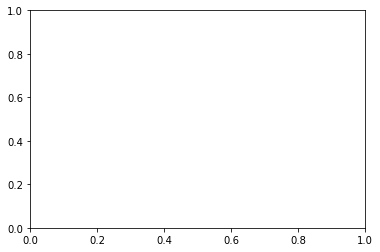

In [36]:
fig=plt.figure()
axes= fig.add_subplot(1,1,1)
axes.hist(visitor['visitor'],bins=0)
axes.set_title('visitor')
axes.set_ylabel('visitor')
axes.set_xlabel(df['date'])
sns.lineplot(x, y, ci=None, hue='nation', 
                marker='o', data=df, linewidth=2)
axes.legend(loc='center left', bbox_to_anchor=(1, 0.5))

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

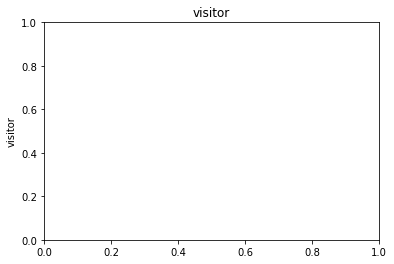

In [37]:
    fig,axes = plt.subplots(1,1,figsize=(6, 4))
    axes.set_title('visitor')
    axes.set_ylabel('visitor')
    axes.set_xlabel(df['date'])
    axes.set_xticklabels('date'.unique(), rotation=45)
    sns.lineplot(x, y, ci=None, hue='nation', 
            marker='o', data=df, linewidth=2)
    axes.legend(loc='center left', bbox_to_anchor=(1, 0.5))

<ipython-input-16-8ac4c5b57ed4>:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes.set_xticklabels(df[x].unique(), rotation=45)
C:\Users\user-pc\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


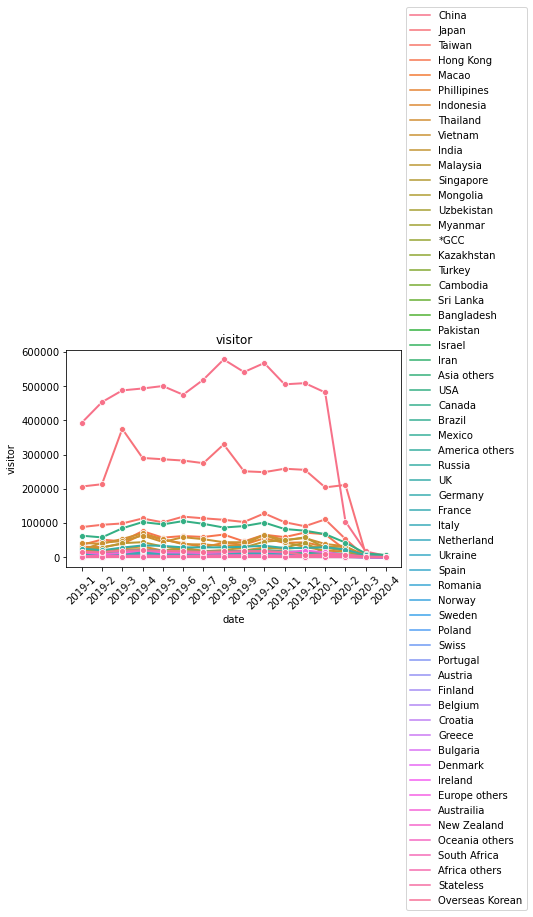

In [17]:
all_graph(df, 'date', 'visitor', 60)

그래프를 통해 중국과 일본이 한국을 방문한 대부분의 방문객을 차지한다는 것을 알 수 있다.
하지만 너무 많은 나라의 그래프로 인해 잘 파악하기 힘드므로 가장 비중이 높은 중국 일본 대만 미국의 그래프를 따로 나타내었다. 

In [108]:
def time_graph(name):
    fig,axes = plt.subplots(1,1,figsize=(10, 8))
    x = df[df['nation']==name].date
    y = df[df['nation']==name].visitor
    axes.set_title(name)
    axes.set_ylabel("The number of visitors")
    axes.set_xlabel("Date")
    axes.set_xticklabels(x, rotation=45)
    axes.plot(x, y, linewidth=3.0)

가장 많은 비중을 차지하는 중국의 방문객 수의 그래프이다.
그래프를 보면 2020년 1월 급격히 방문객 수가 줄어드는 모습을 볼 수 있다.

<ipython-input-108-f14cc2530602>:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes.set_xticklabels(x, rotation=45)


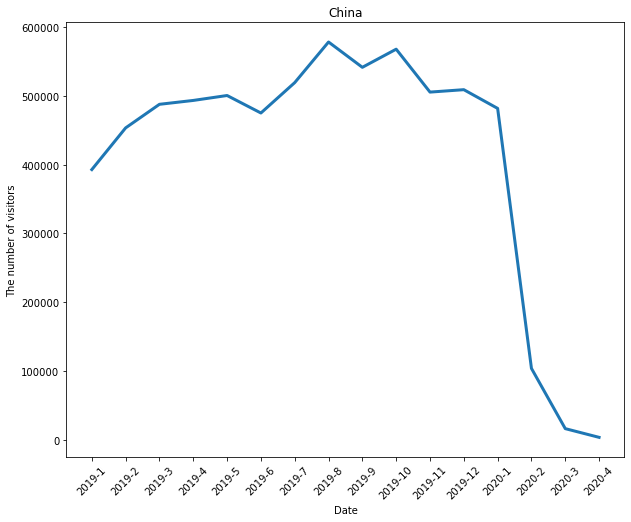

In [110]:
time_graph('China')

두 번째로 많은 방문객 수를 차지하는 일본의 그래프이다.
일본은 2020년 2월 방문객 수가 급격히 줄어드는 모습을 볼 수 있다.

<ipython-input-108-f14cc2530602>:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes.set_xticklabels(x, rotation=45)


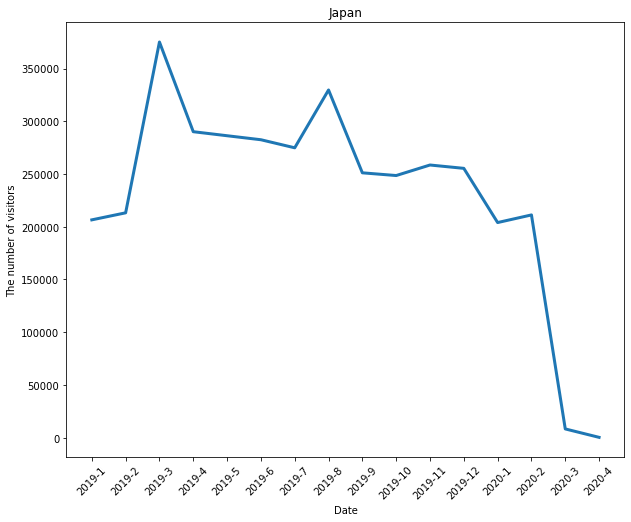

In [111]:
time_graph('Japan')

다음으로 대만은 중국과 마찬가지로 2020년 1월 한국을 방문하는 사람의 수가 급격히 줄어드는 그래프로 나타난다.

<ipython-input-108-f14cc2530602>:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes.set_xticklabels(x, rotation=45)


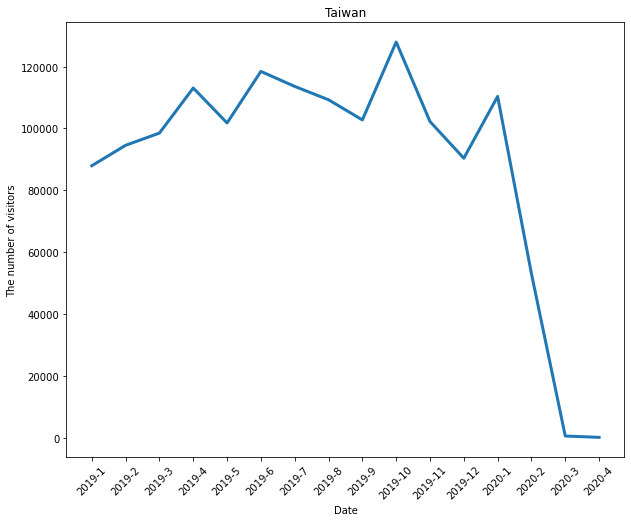

In [112]:
time_graph('Taiwan')

더욱 정확하게 알아보기 위하여 날짜별로 그룹화를 시킨 후 방문객의 평균을 오름차순으로 나타내보았다.

In [163]:
df.groupby('date').mean()['visitor'].sort_values(ascending=True)

date
2020-4       490.250000
2020-3      1391.616667
2020-2     11420.200000
2019-1     18413.383333
2019-2     20030.033333
2020-1     21211.800000
2019-7     24134.450000
2019-11    24273.816667
2019-12    24281.466667
2019-9     24327.733333
2019-6     24603.633333
2019-5     24761.400000
2019-3     25594.016667
2019-8     26438.316667
2019-4     27251.100000
2019-10    27603.250000
Name: visitor, dtype: float64

2019년 1-4월 데이터를 2020년 1-4월 데이터와 직접 비교해보았다.

In [18]:
def month_graph(name):
    fig,axes = plt.subplots(1,1,figsize=(8, 5))
    x = [1, 2, 3, 4]
    y = df[(df['date'].str.endswith(('-1', '-2', '-3', '-4'))) & (df['nation'] == name)].visitor
    
    axes.set_title(name)
    axes.set_ylabel("The number of visitors")
    axes.set_xlabel("Month")
    axes.plot(x, y[:4], c='b', linewidth=5.0, label='2019')
    axes.plot(x, y[4:], c='r', linewidth=5.0, label='2020')
    axes.legend(loc=3)

가장 먼저 중국을 비교해 보았을 때 1월 중순을 기준으로 2019년도에는 상승하는 추세였지만 2020년에는 하락하는 그래프로 나타난다.

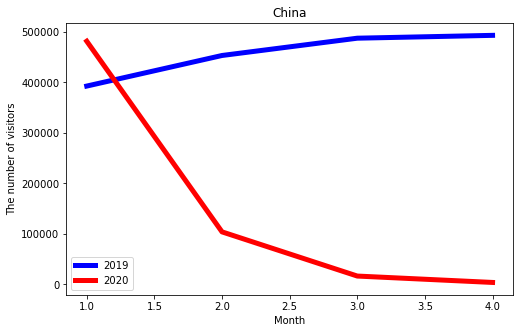

In [19]:
    month_graph('China')

두 번째로 일본은 2월까지는 2019년과 2020년 모두 동일하게 이어가다 2월을 기준으로 2019년은 상승하고 2020년은 하락하는 모습을 띄고 있다

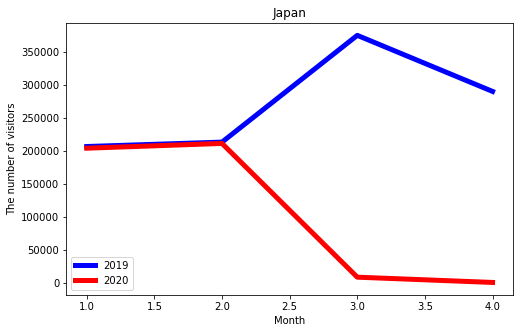

In [130]:
    month_graph('Japan')

세 번째로 대만의 그래프를 살펴보았다.
대만도 마찬가지고 1월 중반부터 2019년과 달리 2020년에는 급격히 하락하는 모습을 볼 수 있다.

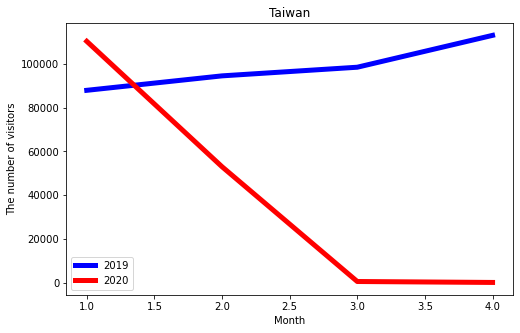

In [131]:
    month_graph('Taiwan')

# 목적 분석

한국의 방문 목적을 구분하여 수치화하고
관광, 사업, 공무, 공부, 기타 순으로 나열하였다.

In [181]:
df1[['tourism','business','official affairs','studying','others']].std()

tourism             57689.519176
business              589.823196
official affairs      363.951599
studying             2737.783911
others               8830.912547
dtype: float64

각 목적별로 평균값을 나타내보았다.

In [185]:
average=[df["tourism"].mean(),
 df["business"].mean(),
 df["official affairs"].mean(),
 df["studying"].mean(),
 df["others"].mean()]


In [187]:
average

[16670.1875, 208.34479166666668, 87.996875, 478.83125, 2943.79375]

각 목적의 평균값을 히스토그램 그래프로 만들어 한눈에 보기 쉽도록 하였다.
한국을 방문하는 목적 중 가장 많은 비중을 차지하는 것은 관광이며 다음으로 기타, 공부, 사업, 공무 순으로 한국을 방문하는 것을 알 수 있다.

<AxesSubplot:>

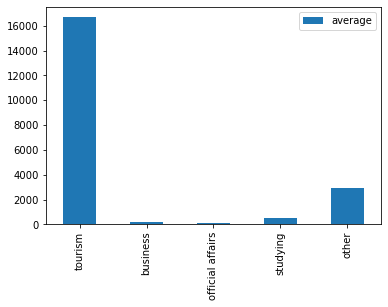

In [188]:
dfavg= pd.DataFrame({'average': average},index=['tourism', 'business', 'official affairs', 'studying','other'])
dfavg.plot.bar(y='average')

# 분석결과

따라서 코로나의 영향으로 한국을 방문하는 외국인의 수가 작년 대비 줄어들었으며. 한국을 방문하는 가장 큰 목적은 관광이라는 것을 알게 되었다.

# 느낀점과 아쉬운점

프로젝트를 진행하면서 느낀 점은 코로나바이러스 이후 모든 나라들의 방문객 수가 줄어든 것을 데이터로 직접 확인하여 한국의 관광명소의 고요함을 더욱 실감하게 되었다. 마지막으로 아쉬웠던 점과 어려웠던 점은 중국 일본 대만의 데이터만 자세히 분석하여 다른 나라들을 세세하게 살펴보지 못한 것이 아쉬웠다. 또한 처음에 원하는 데이터를 찾기가 쉽지 않아 어려움을 겪었다. 더 많은 데이터를 가지고 분석하였다면 더욱 의미 있는 분석과 결과를 도출할 수 있었을 것이라고 생각하여 아쉬움이 남았다.